# 深度学习
一、梯度是什么？Hessian矩阵怎么求？  
1、梯度是一个向量，由该函数对每个自变量的一阶偏导数组成。表示某一函数在该点处的方向导数沿着该方向取得最大值，即函数在该点处沿着该方向变化最快，变化率最大（为该梯度的模）。  
2、Hessian 矩阵是一个多元函数的二阶偏导数构成的方阵。先对函数f求关于每个变量$x_i$的一阶偏导数，再将其对所有变量求偏导得到。

二、如何判断凸函数？  
1、二阶条件：如果f二阶可导，通过其Hessian矩阵的正定性可判断其凸性。  
2、一阶条件：函数的图像应该永远位于其切平面上方：对于定义域内任意两点x和y，满足：$$ f(y)\ge f(x)+\bigtriangledown f(x)^T(y-x) $$

3、定义法：函数图像上任意两点的连线（割线），都在函数图像的上方：$$ f(\theta x+(1-\theta)y)\le \theta f(x)+(1-\theta)f(y) $$

三、逻辑回归如何避免过拟合？  
1、数据层面：增加训练数据、数据增强（CV：旋转、剪切，NLP：同义词替换、回译，推荐系统：Mixup、SMOTE）  
2、模型层面：降低模型复杂度（奥卡姆剃刀）、集成学习  
3、训练层面：  
（1）L1/L2正则化：L1（$\lambda ||w||_1$）倾向于让权重变为0，产生稀疏解，这在特征选择（特别是高维稀疏的推荐系统场景）中非常有用。L2（$\lambda||w||_2^2$），即权重衰减。倾向于让权重变小且分布均匀，防止某个特征主导模型。  
（2）Dropout：在训练过程中，以概率 $p$ 随机让神经元失活（输出置零），相当于训练了无数个子网络的集成。  
（3）早停法：一旦发现验证集 Loss 不降反升，说明开始过拟合，立即停止训练并保存当前的权重。  
（4）Batch Normalization：引入了 mini-batch 的统计噪声，客观上也起到了一定的正则化效果。

四、正则项L1不可导，如何优化？  
在不可导处无法进行梯度下降，此时采用坐标轴下降法：坐标轴下降法是沿着坐标轴的方向，每次固定m-1个数值，对最后一个数值求局部最优解，迭代m次（证明：凸函数在每一个维度都取得最小值，则此处就是全局最小值）

五、概率和似然的区别是什么？  
1、概率是在参数已知的情况下，预测数据发生的可能性。  
2、似然是在数据已知的情况下，推断参数的可能性。

六、Dropout怎么防止过拟合，Dropout在训练和测试区别是什么？  
1、数据层面：每一次随机 Drop，本质上都是在向网络输入“不同的、带有噪声的样本”。  
2、模型层面：网络在每次迭代时都处于“残缺”状态，神经元无法依赖某个特定的上游节点，这迫使网络学习分布式的特征表示，仅仅依靠局部信息也能推导出正确结果。  
3、集成层面：随机 mask 掉不同的神经元，实际上是在训练一个新的、结构不同的子网络，最终的模型就像是成千上万个“残缺子网络”的集成模型。  
4、训练阶段：随机失活（随机删掉隐藏层神经元）——前向传播（删除的神经元不进行前向传播，传给下一层的值为0）——反向传播（把得到的损失结果通过修改后的网络反向传播，随机梯度法更新没有被删除的神经元对应的参数）——恢复与重复（恢复被删掉的神经元，此时被删除的神经元保持原样，而没有被删除的神经元已经有所更新，并重复上述过程）。

七、BN介绍，BN怎么防止过拟合，怎么用的，参数量, 参数怎么得到的？  
1、BN层的作用：保证每层的数据分布都被转换在均值为零，方差为1 的状态，这样每层数据的分布大致是一样的，训练会比较容易收敛。  
2、BN加快训练速度原因：其一能够防止梯度消失和梯度爆炸，其二降低对参数初始化的敏感度。经典解释是使得后一层面对的输入分布相对固定，不需要频繁调整适应，从而加速收敛。现代观点是平滑Loss地形。  
3、BN防止梯度消失：将输出归一化到 sigmoid 函数的线性区域，梯度较大。  
4、BN防止梯度爆炸：前向传播时权重放大，输出不变；反向传播时，权重变大时乘以$\frac{1}{\sigma}$自动调节。  
5、BN防止过拟合：（1）BN使得一个minibatch中所有样本都被关联在一起，因此网络不会从某一个具体的训练样本x中生成确定的结果，即输入同一个训练样本x，每次的输出都是不同的。  
6、BN层在线性层或卷积层之后，在非线性激活函数之前：（1）全连接和卷积层的输出一般是一个对称,非稀疏的一个分布，类似高斯分布，对其进行归一化会得到更加稳定的分布；（2）如果数据先经过 Relu 等激活函数，那么数据集的分布同样不可控，再对它进行 BN 处理，无法达到我们想要的稳定分布的效果。（可能与激活函数的目的相悖）  
7、指数加权移动平均：每次minibatch得到的$\mu , \sigma ^2$进行加权更新。

八、说明SGD、Adam、RMSprop、momentum的异同点。  
$g_t=\bigtriangledown f(w_t)$  
1、SGD（随机梯度下降）：$\eta_t=\alpha * g_t,w_{t+1}=w_t-\eta_t$  
2、Momentum（动量法）：动量$m_t=\beta_1 \cdot m_{t-1}+(1-\beta_1)\cdot g_t $，其中$\beta_1$默认0.9。进而更新参数：$w_{t+1}=w_{t}-m_t$  
3、RMSprop（二阶动量法）：滑动窗口加权平均值计算二阶动量$V_t=\beta_2\cdot V_{t-1}+(1-\beta_2)g_t^2$，其中$\beta_2$默认为0.9，进而更新参数：$w_{t+1}=w_t-\frac{\alpha}{\sqrt(V_t+\epsilon)}\cdot g_t$  
4、Adam：一样需要计算一阶矩$m_t$和二阶矩$V_t$，再除去衰减项（$1-\beta$），最后更新参数：$$ w_{t+1}= w_t-\alpha\frac{m_t}{\sqrt(V_t)+\epsilon}\cdot g_t$$  
5、Adagrad：为每个参数单独维护一个学习率。$G_{t,i}=\sum_{\tau=1}^{t} g^2_{\tau,i}$，对每个参数分别更新：$w_{t+1,i}=w_{t,i}-\frac{\alpha}{\sqrt(G_{t,i})+\epsilon}\cdot g_{t,i}$

九、介绍激活函数的优缺点  
1、Sigmoid：$f(x)=\frac{1}{1+e^{-x}}$。优点：限定输出到（0,1），可微且梯度平滑无跳跃点。缺点：容易梯度消失（两边趋于0且最大只有0.25）；输出中心是0.5不是0权重更新出现 "Zigzag"（锯齿状） 震荡现象，收敛变慢；涉及指数运算计算慢。  
2、Tanh（双曲正切）：$f(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$。优点：输出以0为中心，收敛速度强于Sigmoid。缺点：虽然导数最大有1，但在x较大或较小时，梯度仍趋近于0。  
3、ReLU：$f(x)=max(0,x)$。优点：正区间导数恒为1，解决了梯度消失；计算极快；稀疏性防止过拟合。缺点：非零均值；某个神经元如果权重导致对所有样本输入都<0，则无法再更新。  
4、Leaky ReLU：$f(x)=max(\alpha x,x)$。解决Dead ReLU问题。  
5、GELU：$GELU(x)=x\cdot P(X\le x)=x\cdot \Phi(x) $。核心思想是根据输入 $x$ 的大小，按概率随机遮挡它（Dropout 的思想），但这个概率是由 $x$ 自身服从正态分布的累积概率决定的，直观上是平滑版的ReLU。  
优点：（1）平滑性：GELU处处连续且可导（ReLU在0处不可导）（2）概率解释性：引入了随机过程的思想（类似于 Dropout 的期望），模拟复杂非线性关系能力更强（3）非单调性：在负值区域（$x < 0$）有一个轻微的弯曲，允许微弱的负梯度回传，避免了 Dead ReLU 问题。  
缺点：（1）计算代价高：包含误差函数或Tanh近似（2）无上界：如果网络层数深且没有Norm则数值容易发散  
6、Swish：$Swish(x)=x\cdot \sigma(\beta x)=x\cdot \frac{1}{1+e^{-\beta x}}$。$sigma$是Sigmoid函数，这是一种“自门控”机制。输入 $x$ 既是信号本身，又是控制信号强度的“门”。   
优点：（1）非单调性的“山谷”：在 $x$ 接近 0 的负半轴，它不是 0，而是一个负值。这意味着它能保留“小的负反馈信息”，这对于捕捉深层网络中微妙的特征交叉非常有帮助。（2）参数$\beta$可调，当其趋于无穷时变成ReLU，当其趋于0时变成线性函数$x/2$（3）无上界有下界，具备平滑特性。  
缺点：（1）计算成本，涉及指数运算（2）预测不可控：由于非单调性，输入变小输出反而可能变大（在负区间）

十、梯度爆炸和梯度消失问题  
1、本质原因：网络加深、参数共享；如果参数特征值不在1附近，反向传播会发生连乘效应  
2、表现：梯度消失导致无法收敛；梯度爆炸导致效果不稳定  
3、梯度消失解决方法：（1）换激活函数：用relu族的，sigmoid、tanh两端平滑容易梯度消失（2）用BN和LN，本质上让参数特征在1附近；（3）换网络，用Resnet（残差网络引入残差连接Skip Connection$y=F(x)+x$，求导时候有1，可以解决梯度消失 ）和LSTM（引入了 Cell State和门控机制，可以看作加法）（4）用预训练网络  
4、梯度爆炸解决方法：（1）用BN和LN，本质上让参数特征在1附近；（2）梯度裁剪（3）正则化：L2正则化，在Loss中加入$\frac{1}{2} \lambda||W||^2$，减小权重矩阵W的权重  

十一、网络权重初始化为0有什么影响，初始化为一个非0的常数呢？  
1、W和b都取0：每一层前向传播输出和反向传播梯度都是一样的，相当于这一层只有 1 个神经元在起作用。  
2、只有W初始化为0：每次更新只能让最后一个全0权重层非0，由于W从0开始一点点变大意味着梯度消失更容易出现  
3、只有b初始化为0：是可以的  
4、W全部初始化为非0常数：同1

十二、embedding如何设置维度？越大越好还是越小越好？  
1、维度低：结构粗糙，拟合能力有限  
2、维度高：需要更多数据集，且容易维度灾难和过拟合  
3、需要结合特征的取值和分布、特征实际的业务意义、问题规模、经验参数，反复调参迭代、优化得到；

十三、embedding如何训练  
1、推荐系统中embedding有两种：  
（1）离散特征通过端到端训练，先通过embedding层再和其他特征合并训练；  
（2）多模态特征或者其他预训练特征，通过NLP、CV等内容理解方法抽取出来后和推荐特征合并训练；  
2、NLP中的词向量embedding：  
（1）CBOW(Continuous Bag-of-Words)：现在句子中选定一个中心词，并把其它词作为这个中心词的上下文。在学习过程中，使用上下文的词向量推理中心词，这样中心词的词义就被传递到上下文的词向量中，从而达到学习语义信息的目的。  
（2）Skip-gram：同样先选定一个中心词，并把其他词作为这个中心词的上下文。不同的是，在学习过程中，使用中心词的词向量去推理上下文，这样上下文定义的语义被传入中心词的表示中，从而达到学习语义信息的目的。  
（3）CBOW比Skip-gram训练速度快，且训练过程更稳定。因为CBOW使用上下文Average的方式进行训练，每个训练step会见到更多样本。而在生僻字处理上，Skip-gram比CBOW效果更好，原因是Skip-gram不会刻意回避生僻字（CBOW结构钟当输入存在生僻字时，生僻字会被其它非生僻字的权重冲淡，而在Skip-gram中，只要它作为中心词出现了，它就能获得完整的、不被稀释的梯度更新）。

十四、word2vec如何进行负采样  
1、核心思想：分别计算正负样本的loss，这样负样本就可以选择采样的那几条，而不是除开正样本以外的所有样本。  
2、一个单词被选为negative sample的概率跟他出现频次有关，出现频次越高的单词越容易被选作negative words（使用0.75次幂提升低频词被采样的概率）












# 特征工程
一、特征工程一般怎么做？  
1、特征工程是从原始数据中提取特征以供算法和模型使用的工程。特征工程是一个反复迭代不断优化的过程，最重要的是提问题、做假设、去验证。做特征工程前思考所有和业务有关的变量数据，思考可行性：数据获取难度、数据规模、覆盖率等信息，获得数据后进行一些特征处理如下：  
2、数据探索（EDA）和预处理：（1）量纲转换、离散特征编码、连续特征分桶（2）特征清洗（3）缺失值处理  
3、特征选择：（1）计算数据是否发散，信息熵为0的特征没有意义，对结果没有区分度（2）计算特征重要性选择（3）包装法（4）计算相关系数或者假设检验等数学方法  
4、特征构造、交叉：（1）数据降维，PCA或LDA（2）特征交叉

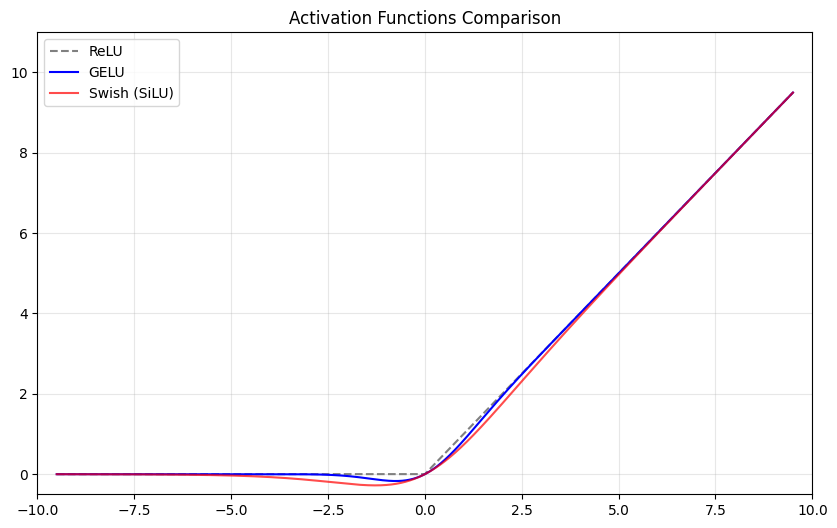

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def swish(x, beta=1.0):
    return x * (1 / (1 + np.exp(-beta * x)))

def gelu(x):
    # 使用近似公式
    cdf = 0.5 * (1.0 + np.tanh((np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3)))))
    return x * cdf

# 生成数据
x = np.linspace(-9.5, 9.5, 5000)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(x, relu(x), label='ReLU', color='gray', linestyle='--')
plt.plot(x, gelu(x), label='GELU', color='blue')
plt.plot(x, swish(x), label='Swish (SiLU)', color='red', alpha=0.7)

# 重点圈出“下凹”区域
plt.xlim(-10, 10)
plt.ylim(-0.5, 11)
plt.title("Activation Functions Comparison")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()